In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Dataset

In [83]:
# Read the CSV file into a DataFrame
dataset = pd.read_csv("Dataset/output_dataset.csv")
dataset.head()

,index,login,country,account_currency,reg_date,Total_Trades,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_Open_Price,...,Average_TP,Average_SL,Most_Common_Trading_Method,Average_Commission,Average_Swaps,Average_Profit,active,Trading_Method,longevity,longevity_bin
0,1,524978,Austria,EUR,2023-06-07 05:58:36,1392,47.485632,1.230632,4.044965e+08,513.912144,...,297.756577,168.537030,1,-6.935588,-1.481077,25.668214,False,Expert,142,2
1,2,524979,France,USD,2023-06-07 06:17:30,2194,49.635369,0.013943,6.724644e+03,20467.746053,...,2818.566659,12916.827370,5,0.000000,-0.111285,-0.837867,False,Mobile,107,2
2,4,760487,Singapore,SGD,2023-01-04 08:48:24,69,15.942029,0.012609,2.783882e+03,11010.476377,...,10337.456522,168.292464,1,0.000000,0.002172,-10.232797,False,Expert,13,0
3,5,804664,Malaysia,USD,2023-09-24 07:02:49,85,63.529412,0.018706,5.490400e+03,1265.465529,...,0.000000,0.000000,5,0.000000,-0.023176,-0.524588,False,Mobile,9,0
4,6,804687,Australia,AUD,2023-01-10 10:26:00,484,51.239669,0.019773,5.271755e+05,433.944222,...,323.711256,431.677983,5,-0.101129,-0.009749,-0.210692,False,Mobile,372,5


In [84]:
# Retrieving the outlier
dataset_outlier = dataset[dataset['login'] == 88944670]

# Removing the outlier
dataset = dataset[dataset['login'] != 88944670]

Splitting the dataset into different Longevity Bins

In [ ]:
longevity_0_dataset = dataset[dataset['longevity_bin'] == 0]
longevity_1_dataset = dataset[dataset['longevity_bin'] == 1]
longevity_2_dataset = dataset[dataset['longevity_bin'] == 2]
longevity_3_dataset = dataset[dataset['longevity_bin'] == 3]
longevity_4_dataset = dataset[dataset['longevity_bin'] == 4]
longevity_5_dataset = dataset[dataset['longevity_bin'] == 5]

In [ ]:
# Defining colors for each Bin
colors = ['yellow', 'orchid', 'turquoise', 'mediumspringgreen', 'cornflowerblue', 'indianred']
bin_labels = ['0 to 30 Days', '31 to 90 Days', '91 to 180 Days', '181 to 270 Days', '271 to 360 Days', '360+ Days']

# Number of Users In Longevity Bins

5724


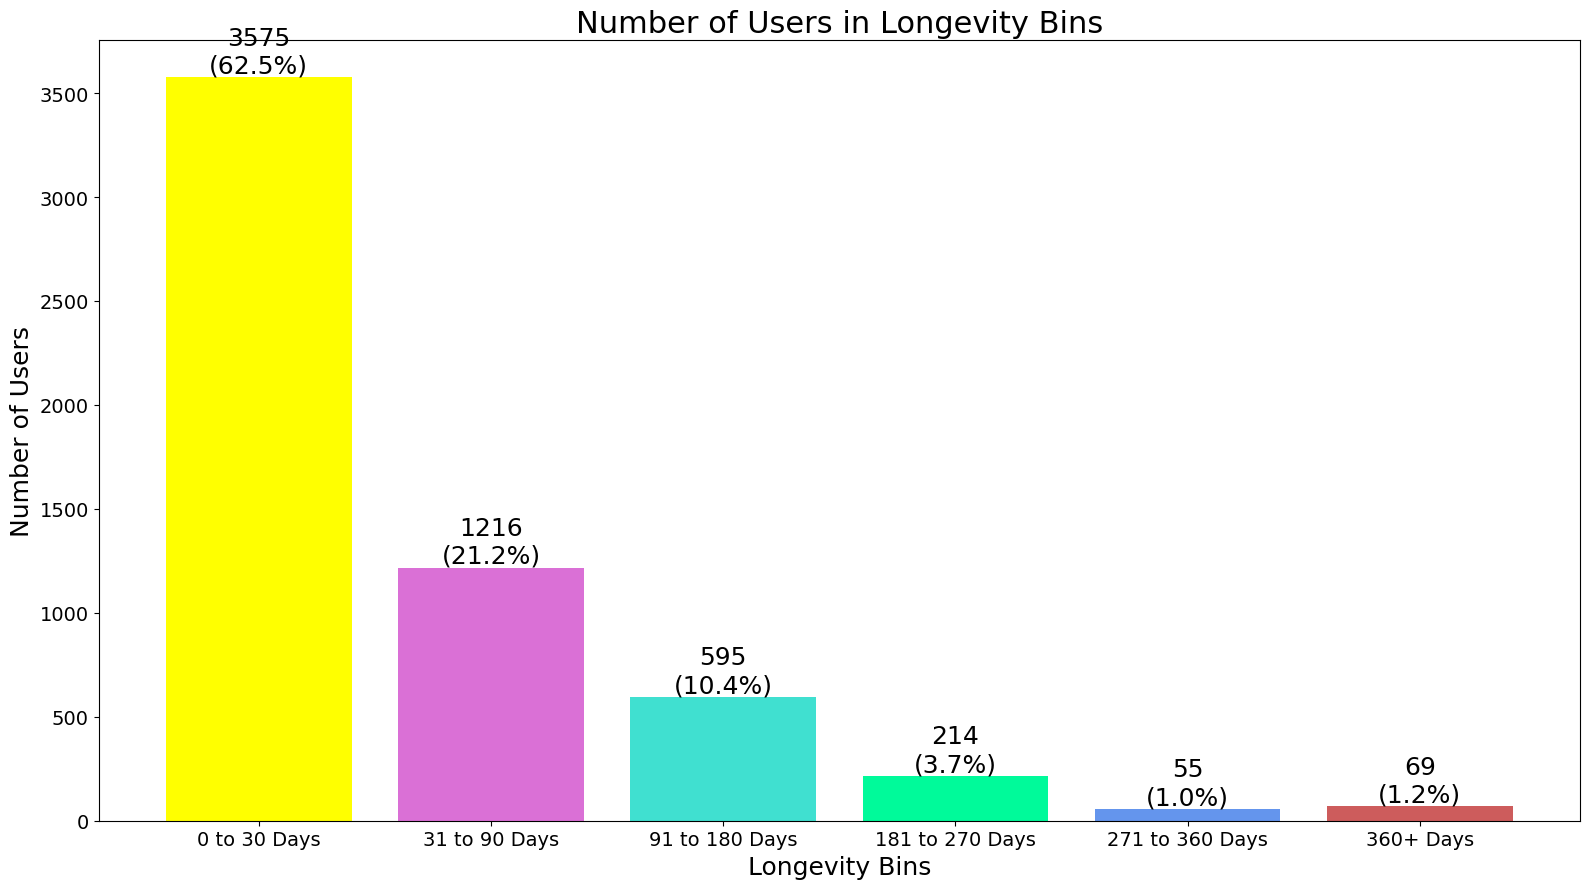

In [161]:
# List to store the sizes of each dataset
sizes = [
    longevity_0_dataset.shape[0],
    longevity_1_dataset.shape[0],
    longevity_2_dataset.shape[0],
    longevity_3_dataset.shape[0],
    longevity_4_dataset.shape[0],
    longevity_5_dataset.shape[0]
]

# Total number of users
total_users = sum(sizes)

print(total_users)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
bars = plt.bar(range(len(sizes)), sizes, color=colors)
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Number of Users', fontsize=18)
plt.title('Number of Users in Longevity Bins', fontsize=22)
plt.xticks(range(len(sizes)), bin_labels, fontsize=14)
plt.yticks(fontsize=14)

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}\n({height/total_users:.1%})', ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.show()

# Average Trades Per Day during Period of Activity

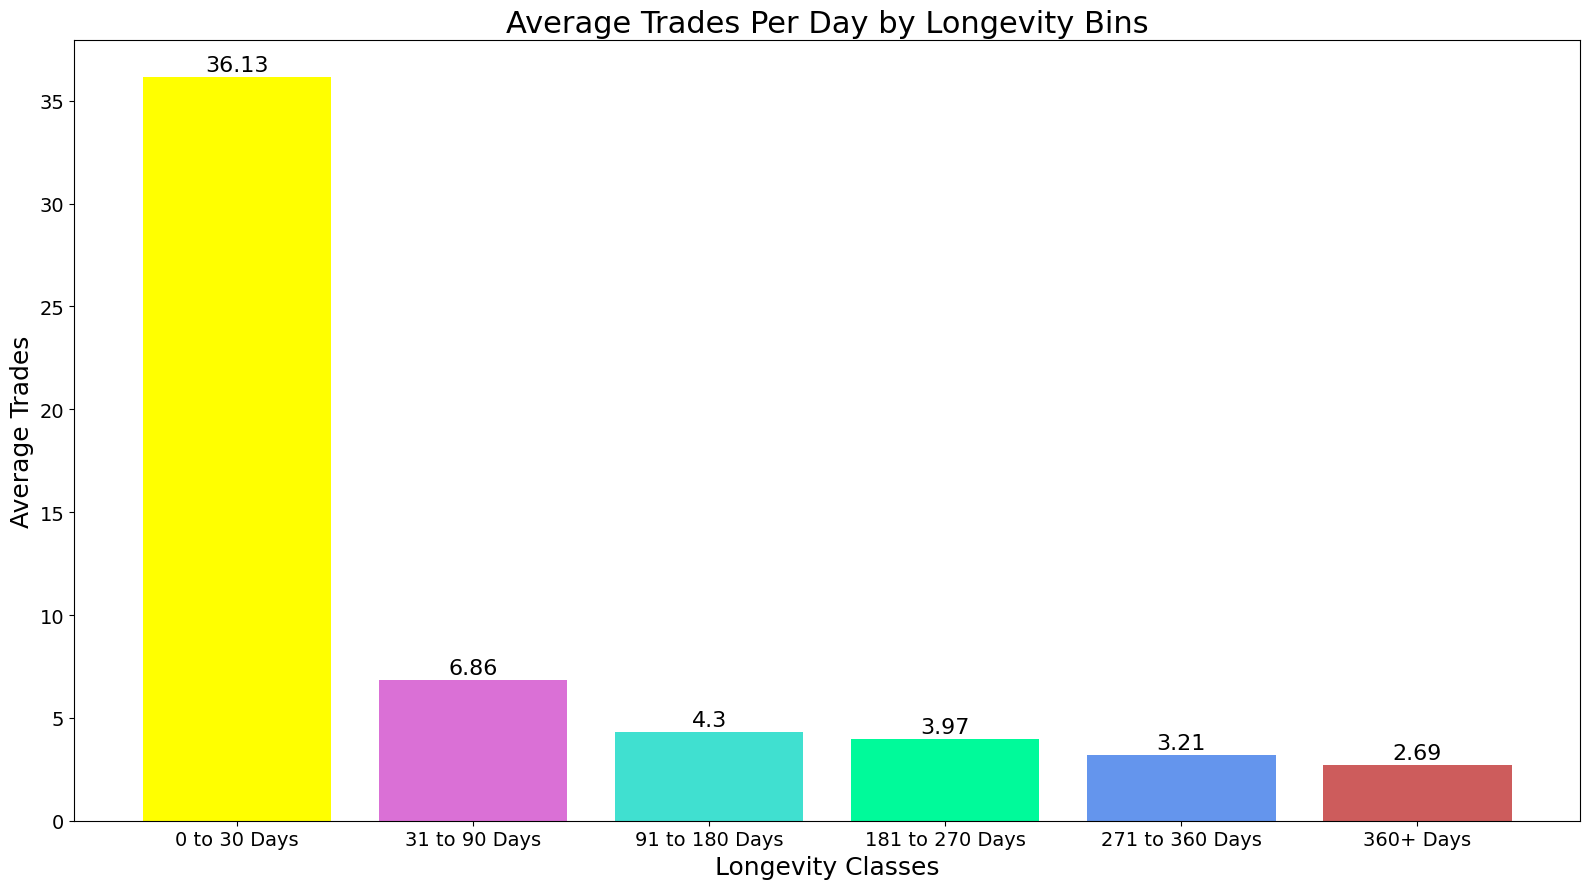

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    (longevity_0_dataset['Total_Trades'] / longevity_0_dataset['longevity'].replace(0, 1)).mean(),
    (longevity_1_dataset['Total_Trades'] / longevity_1_dataset['longevity'].replace(0, 1)).mean(),
    (longevity_2_dataset['Total_Trades'] / longevity_2_dataset['longevity'].replace(0, 1)).mean(),
    (longevity_3_dataset['Total_Trades'] / longevity_3_dataset['longevity'].replace(0, 1)).mean(),
    (longevity_4_dataset['Total_Trades'] / longevity_4_dataset['longevity'].replace(0, 1)).mean(),
    (longevity_5_dataset['Total_Trades'] / longevity_5_dataset['longevity'].replace(0, 1)).mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(averages[i], 2), ha='center', va='bottom', fontsize=16)

# Adding labels and title
plt.xlabel('Longevity Classes', fontsize=18)
plt.ylabel('Average Trades', fontsize=18)
plt.title('Average Trades Per Day by Longevity Bins', fontsize=22)

# Adding x-axis labels
plt.xticks(range(len(bin_labels)), bin_labels, fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Average Trades Per User

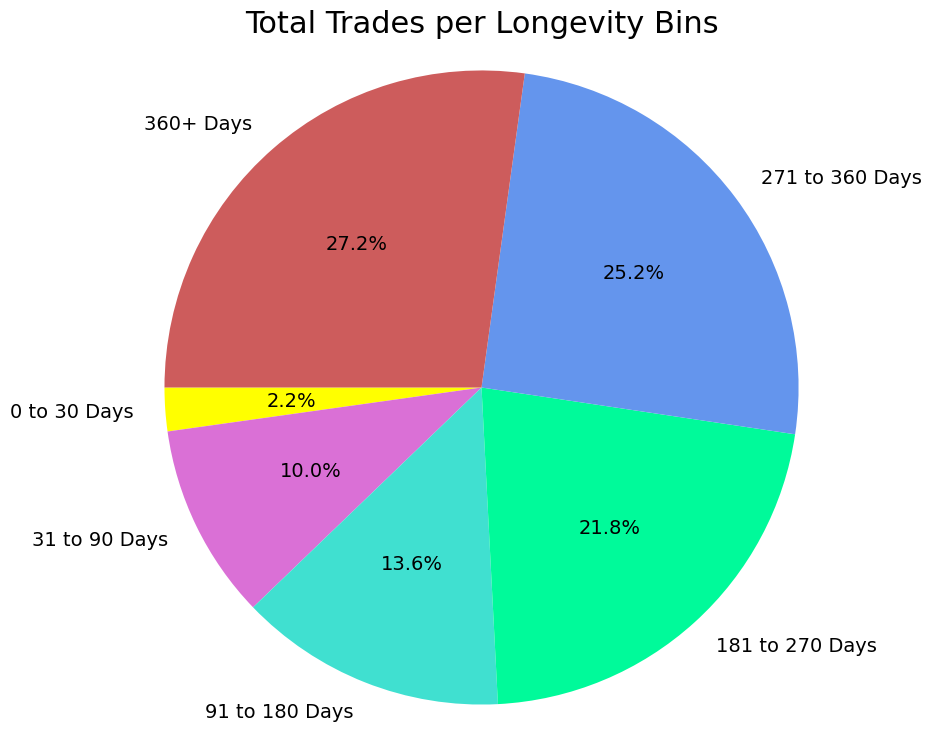

In [ ]:
sizes = [
    longevity_0_dataset['Total_Trades'].mean(),
    longevity_1_dataset['Total_Trades'].mean(),
    longevity_2_dataset['Total_Trades'].mean(),
    longevity_3_dataset['Total_Trades'].mean(),
    longevity_4_dataset['Total_Trades'].mean(),
    longevity_5_dataset['Total_Trades'].mean()
]

# Calculate the total sum of trades
total_trades = sum(sizes)

# Calculate the percentages
percentages = [(size / total_trades) * 100 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=bin_labels, autopct='%1.1f%%', startangle=180, colors=colors, textprops={'fontsize': 14})
plt.title('Total Trades per Longevity Bins', fontsize=22)
plt.axis('equal') 
plt.show()

# Distribution of Trading Methods Across Longevity Bins

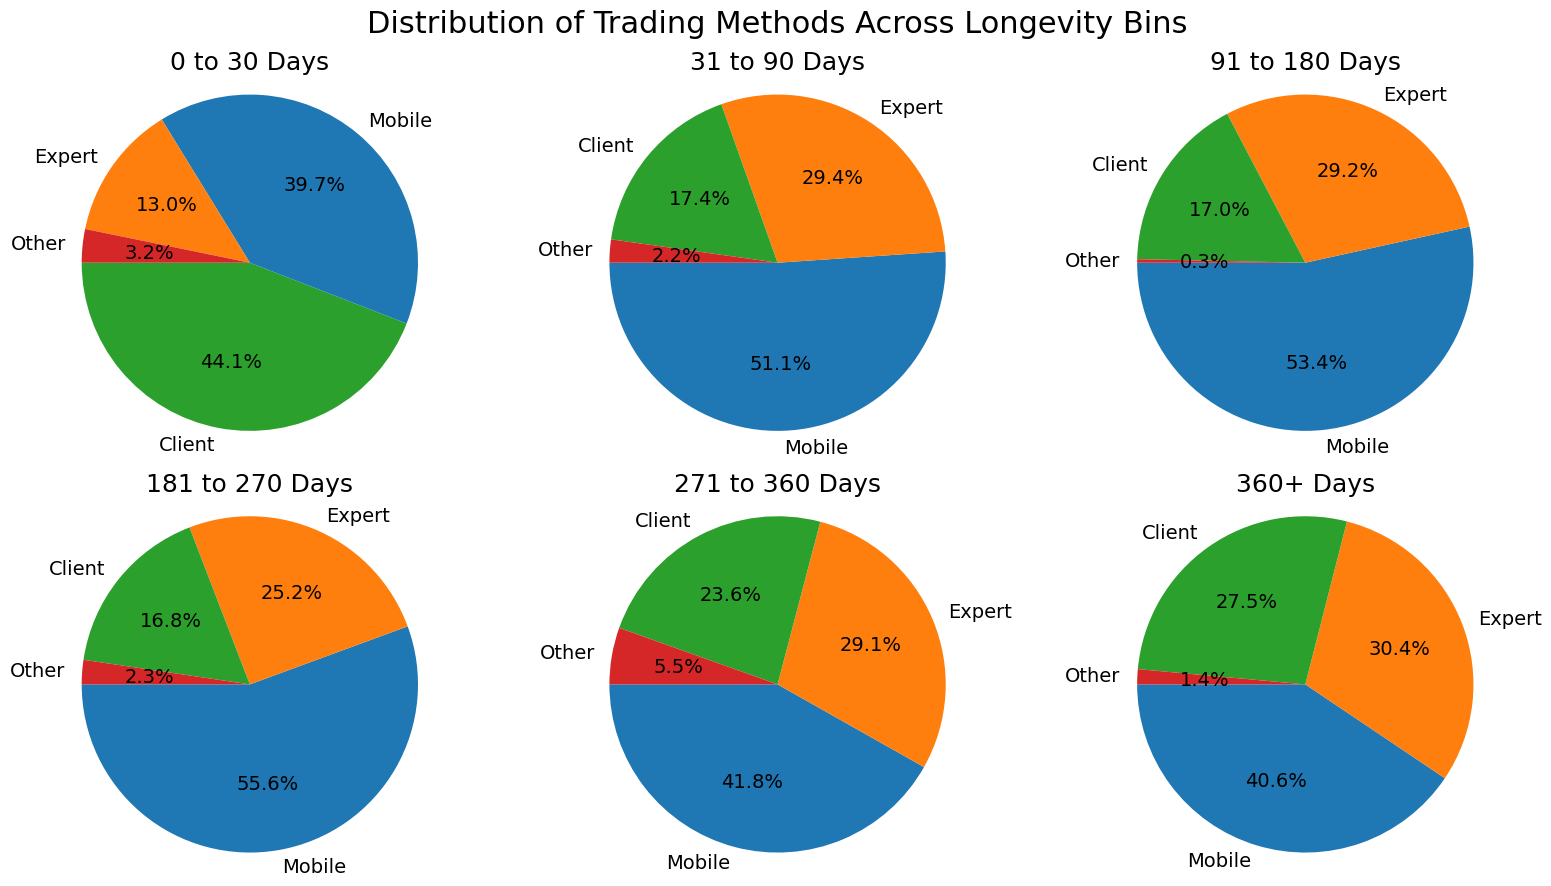

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot pie charts
def plot_pie_chart(dataset, title, ax):
    trading_methods = dataset['Trading_Method']
    method_counts = trading_methods.value_counts()
    
    # Define colors for each trading method
    colors_0 = {'Expert': 'tab:orange', 'Mobile': 'tab:blue', 'Other': 'tab:red', 'Client': 'tab:green'}
    label_colors = [colors_0.get(method, 'gray') for method in method_counts.index]
    
    ax.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 14}, colors=label_colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title, fontsize=18)

# Create a 2x3 subplot grid 
fig, axs = plt.subplots(2, 3, figsize=(16, 9))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting pie charts for each dataset
for i, (dataset, title) in enumerate(
    zip(
        [longevity_0_dataset, longevity_1_dataset, longevity_2_dataset, longevity_3_dataset, longevity_4_dataset, longevity_5_dataset], 
        bin_labels)):
    plot_pie_chart(dataset, title, axs[i])

# Add a common title for the entire plot
plt.suptitle('Distribution of Trading Methods Across Longevity Bins', fontsize=22)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Average Open Price

In [ ]:
'''
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Open_Price'].mean(),
    longevity_1_dataset['Average_Open_Price'].mean(),
    longevity_2_dataset['Average_Open_Price'].mean(),
    longevity_3_dataset['Average_Open_Price'].mean(),
    longevity_4_dataset['Average_Open_Price'].mean(),
    longevity_5_dataset['Average_Open_Price'].mean()
    ]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels for the averages on top of each bar
for bar, avg in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{avg:.2f}', ha='center', va='top', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Open Price', fontsize=18)
plt.title('Average Open Price Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Calculate averages\naverages = [\n    longevity_0_dataset['Average_Open_Price'].mean(),\n    longevity_1_dataset['Average_Open_Price'].mean(),\n    longevity_2_dataset['Average_Open_Price'].mean(),\n    longevity_3_dataset['Average_Open_Price'].mean(),\n    longevity_4_dataset['Average_Open_Price'].mean(),\n    longevity_5_dataset['Average_Open_Price'].mean()\n    ]\n\n# Creating the plot\nplt.figure(figsize=(16, 9))\n\n# Plotting the bar graph\nbars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)\n\n# Adding labels for the averages on top of each bar\nfor bar, avg in zip(bars, averages):\n    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{avg:.2f}', ha='center', va='top', fontsize=12, color='black')\n\n# Adding labels and title\nplt.xlabel('Longevity Bins', fontsize=18)\nplt.ylabel('Average Open Price', fontsize=18)\nplt.title('Average Open Price Across Longevity Bins', fontsize=22)\n\nplt.xti

# Average Close Price

In [ ]:
'''
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Close_Price'].mean(),
    longevity_1_dataset['Average_Close_Price'].mean(),
    longevity_2_dataset['Average_Close_Price'].mean(),
    longevity_3_dataset['Average_Close_Price'].mean(),
    longevity_4_dataset['Average_Close_Price'].mean(),
    longevity_5_dataset['Average_Close_Price'].mean()
    ]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels for the averages on top of each bar
for bar, avg in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{avg:.2f}', ha='center', va='top', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Close Price', fontsize=18)
plt.title('Average Close Price Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Calculate averages\naverages = [\n    longevity_0_dataset['Average_Close_Price'].mean(),\n    longevity_1_dataset['Average_Close_Price'].mean(),\n    longevity_2_dataset['Average_Close_Price'].mean(),\n    longevity_3_dataset['Average_Close_Price'].mean(),\n    longevity_4_dataset['Average_Close_Price'].mean(),\n    longevity_5_dataset['Average_Close_Price'].mean()\n    ]\n\n# Creating the plot\nplt.figure(figsize=(16, 9))\n\n# Plotting the bar graph\nbars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)\n\n# Adding labels for the averages on top of each bar\nfor bar, avg in zip(bars, averages):\n    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{avg:.2f}', ha='center', va='top', fontsize=12, color='black')\n\n# Adding labels and title\nplt.xlabel('Longevity Bins', fontsize=18)\nplt.ylabel('Average Close Price', fontsize=18)\nplt.title('Average Close Price Across Longevity Bins', fontsize=22)\n\

# Average Profit

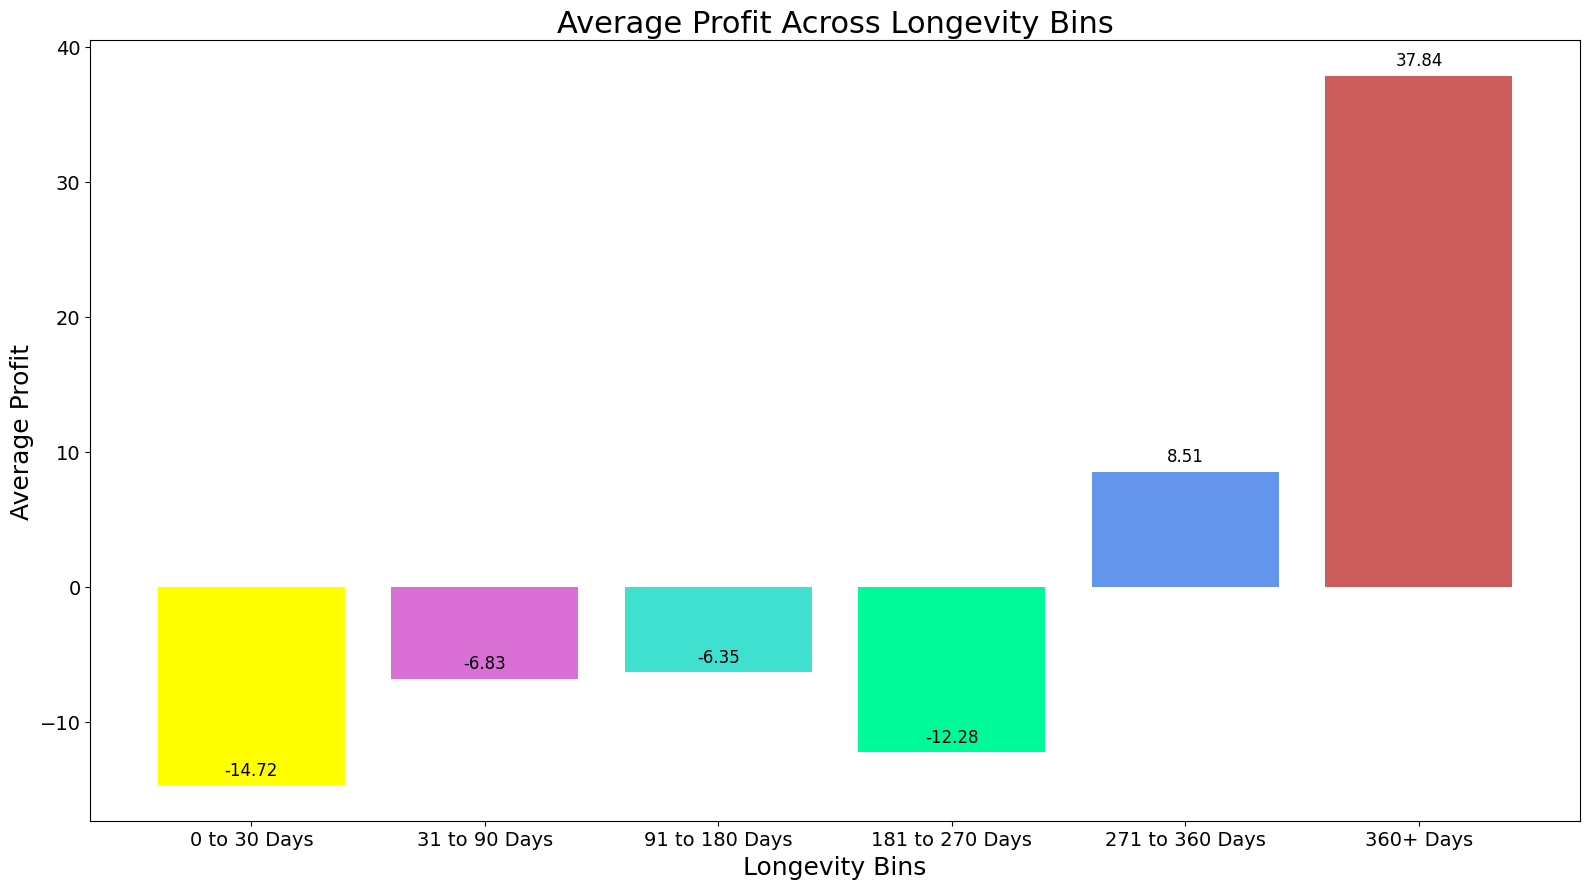

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Profit'].mean(),
    longevity_1_dataset['Average_Profit'].mean(),
    longevity_2_dataset['Average_Profit'].mean(),
    longevity_3_dataset['Average_Profit'].mean(),
    longevity_4_dataset['Average_Profit'].mean(),
    longevity_5_dataset['Average_Profit'].mean()
    ]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels for the averages on top of each bar
for bar, avg in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{avg:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Profit', fontsize=18)
plt.title('Average Profit Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()

# Outlier

In [93]:
dataset_outlier

,index,login,country,account_currency,reg_date,Total_Trades,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_Open_Price,...,Average_TP,Average_SL,Most_Common_Trading_Method,Average_Commission,Average_Swaps,Average_Profit,active,Trading_Method,longevity,longevity_bin
5695,8128,88944670,Nigeria,USD,2023-01-08 03:05:43,126,77.777778,16.765952,1.760092e+08,1676.922347,...,1258.42072,1423.128242,1,0.0,0.0,8112.156508,False,Expert,299,4


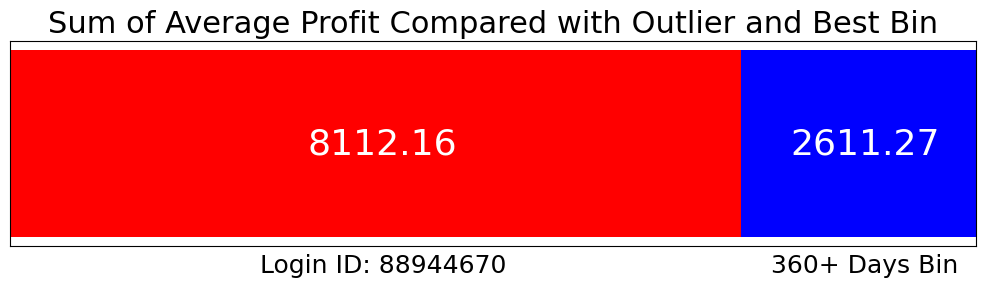

In [160]:
import matplotlib.pyplot as plt

# Define the data
outlier_sum = dataset_outlier['Average_Profit'].sum()
bin_sum = longevity_5_dataset['Average_Profit'].sum()

# Create the plot
plt.figure(figsize=(10, 3))

# Plot the stacked bars horizontally
bars = plt.barh([0], outlier_sum, color='red')
bars += plt.barh([0], bin_sum, left=outlier_sum, color='blue')

# Ploting Text
plt.text((bars[0].get_width() / 2) + 900 , bars[0].get_y() + bars[0].get_height() / 2, f'{bars[0].get_width():.2f}', ha='right', va='center', fontsize=26, color='white')
plt.text((bars[1].get_width() / 2) + 900 + bars[0].get_width(), bars[1].get_y() + bars[1].get_height() / 2, f'{bars[1].get_width():.2f}', ha='right', va='center', fontsize=26, color='white')

# Adding labels and title
plt.title('Sum of Average Profit Compared with Outlier and Best Bin', fontsize=22)

plt.yticks([], [])
plt.xticks([], [])

plt.xlim([0, bars[0].get_width() + bars[1].get_width()])

# Adding gap and text at the bottom
plt.text((bars[0].get_width() / 2) + 80, -0.52, 'Login ID: 88944670', fontsize=18, ha='center', va='center')
plt.text((bars[1].get_width() / 2) + 60 + bars[0].get_width(), -0.52, '360+ Days Bin', fontsize=18, ha='center', va='center')

# Display the graph
plt.tight_layout()
plt.show()


# Average Volume

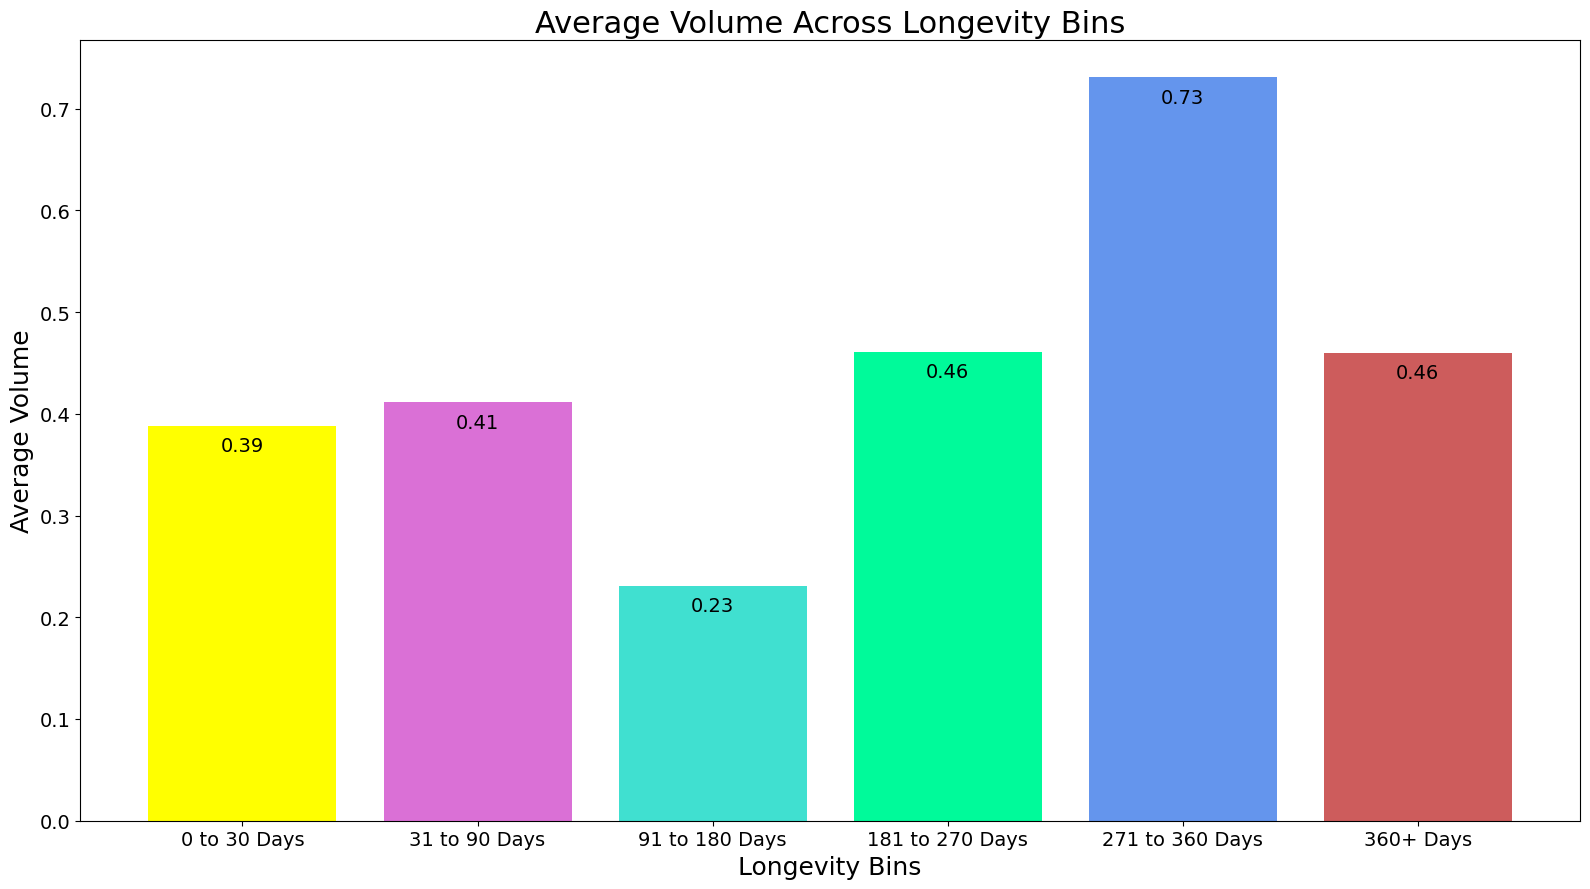

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Volume'].mean(),
    longevity_1_dataset['Average_Volume'].mean(),
    longevity_2_dataset['Average_Volume'].mean(),
    longevity_3_dataset['Average_Volume'].mean(),
    longevity_4_dataset['Average_Volume'].mean(),
    longevity_5_dataset['Average_Volume'].mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{averages[i]:.2f}', ha='center', va='top', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Volume', fontsize=18)
plt.title('Average Volume Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Average Volume USD

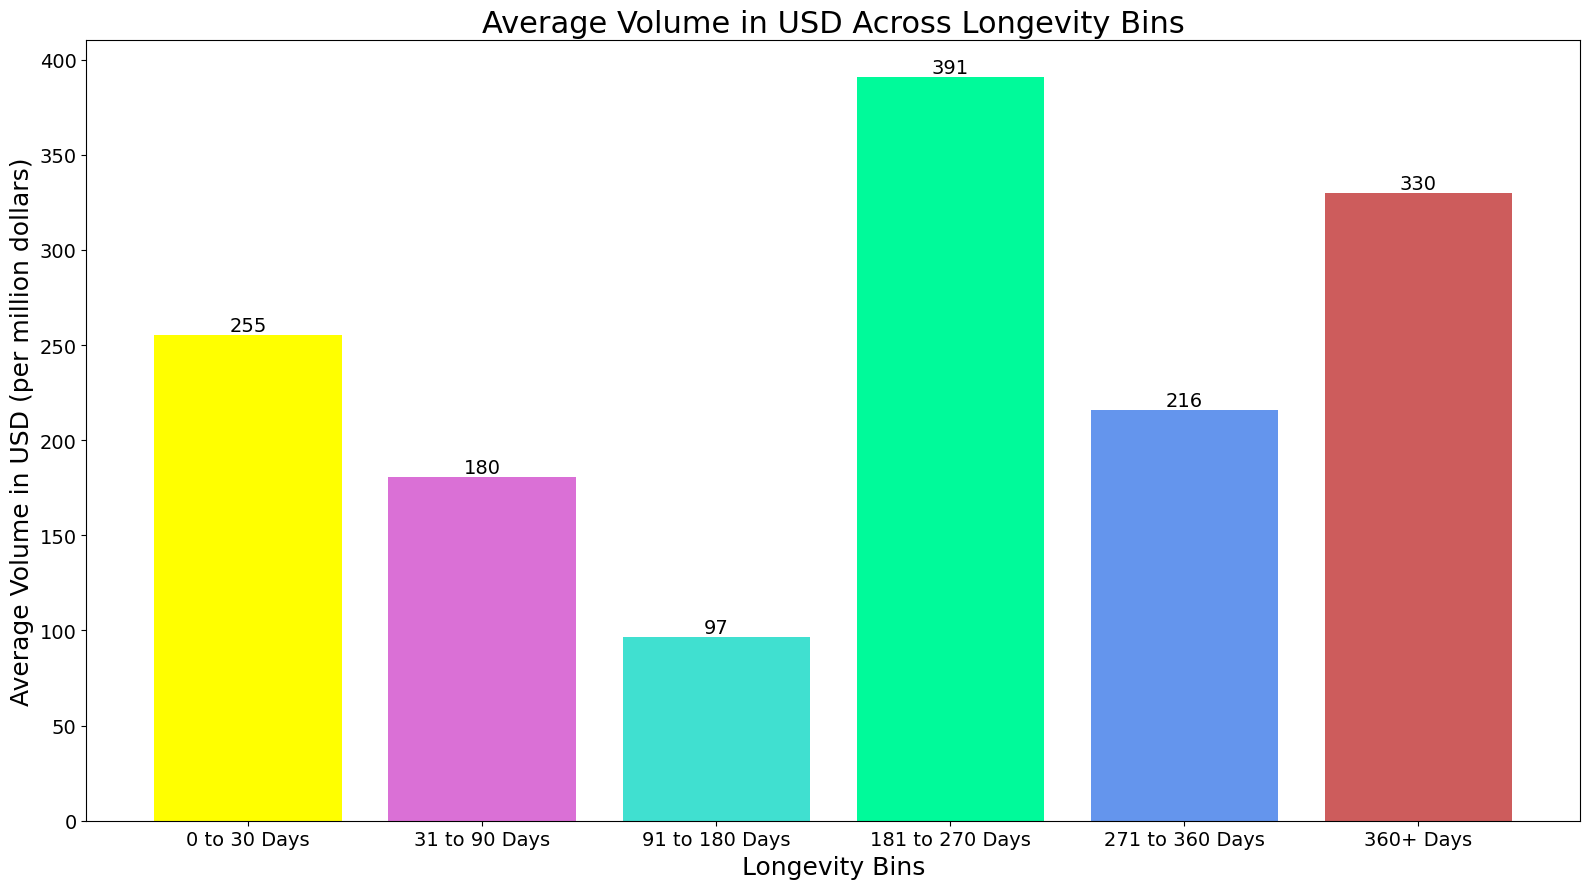

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Volume_USD'].mean() / 1e6,
    longevity_1_dataset['Average_Volume_USD'].mean() / 1e6,
    longevity_2_dataset['Average_Volume_USD'].mean() / 1e6,
    longevity_3_dataset['Average_Volume_USD'].mean() / 1e6,
    longevity_4_dataset['Average_Volume_USD'].mean() / 1e6,
    longevity_5_dataset['Average_Volume_USD'].mean() / 1e6
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to bars
for bar, label in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label:.0f}', ha='center', va='bottom', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Volume in USD (per million dollars)', fontsize=18)
plt.title('Average Volume in USD Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Buy Vs Sell

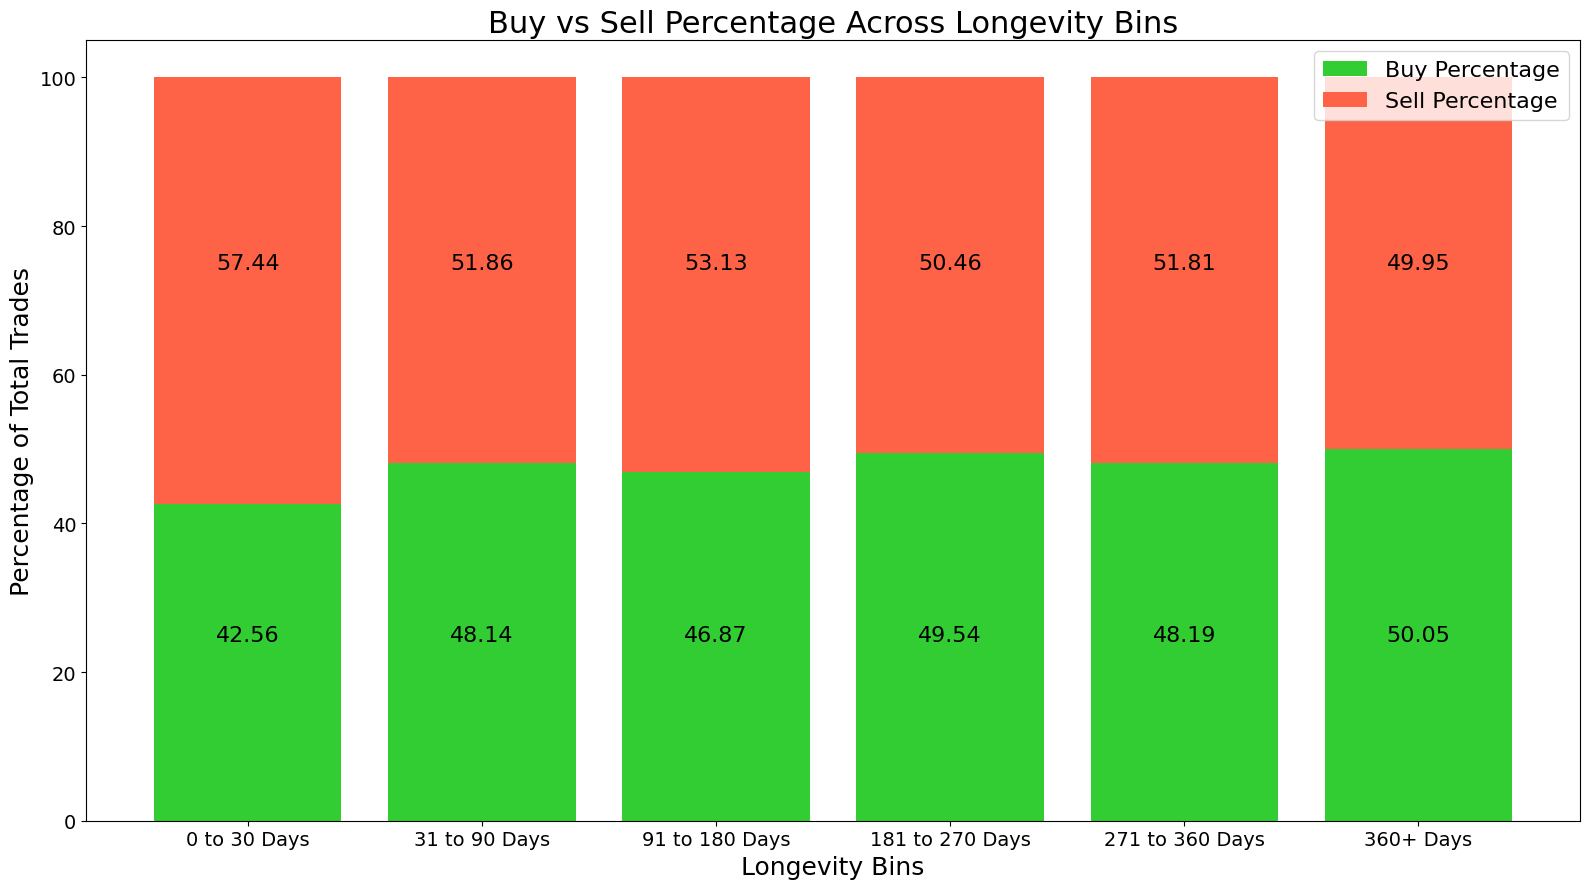

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the corresponding data for each bin
buy_percentage = [
    longevity_0_dataset['Buy_Percentage'].mean(),
    longevity_1_dataset['Buy_Percentage'].mean(),
    longevity_2_dataset['Buy_Percentage'].mean(),
    longevity_3_dataset['Buy_Percentage'].mean(),
    longevity_4_dataset['Buy_Percentage'].mean(),
    longevity_5_dataset['Buy_Percentage'].mean()
    ]

sell_percentage = [
    100 - longevity_0_dataset['Buy_Percentage'].mean(),
    100 - longevity_1_dataset['Buy_Percentage'].mean(),
    100 - longevity_2_dataset['Buy_Percentage'].mean(),
    100 - longevity_3_dataset['Buy_Percentage'].mean(),
    100 - longevity_4_dataset['Buy_Percentage'].mean(),
    100 - longevity_5_dataset['Buy_Percentage'].mean()
    ]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the stacked bar graph
bars1 = plt.bar(bin_labels, buy_percentage, color='limegreen', label='Buy Percentage')
bars2 = plt.bar(bin_labels, sell_percentage, bottom=buy_percentage, color='tomato', label='Sell Percentage')
# Add similar lines for other categories as needed

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Percentage of Total Trades', fontsize=18)
plt.title('Buy vs Sell Percentage Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding legend
plt.legend(fontsize=16)

# Adding labels on each bar
for bars in [bars1]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, 25, round(bar.get_height(), 2), ha='center', va='center', fontsize=16, color='black')

# Adding labels on each bar
for bars in [bars2]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, 75, round(bar.get_height(), 2), ha='center', va='center', fontsize=16, color='black')
        
# Displaying the graph
plt.tight_layout()
plt.show()


# Average Take Profit

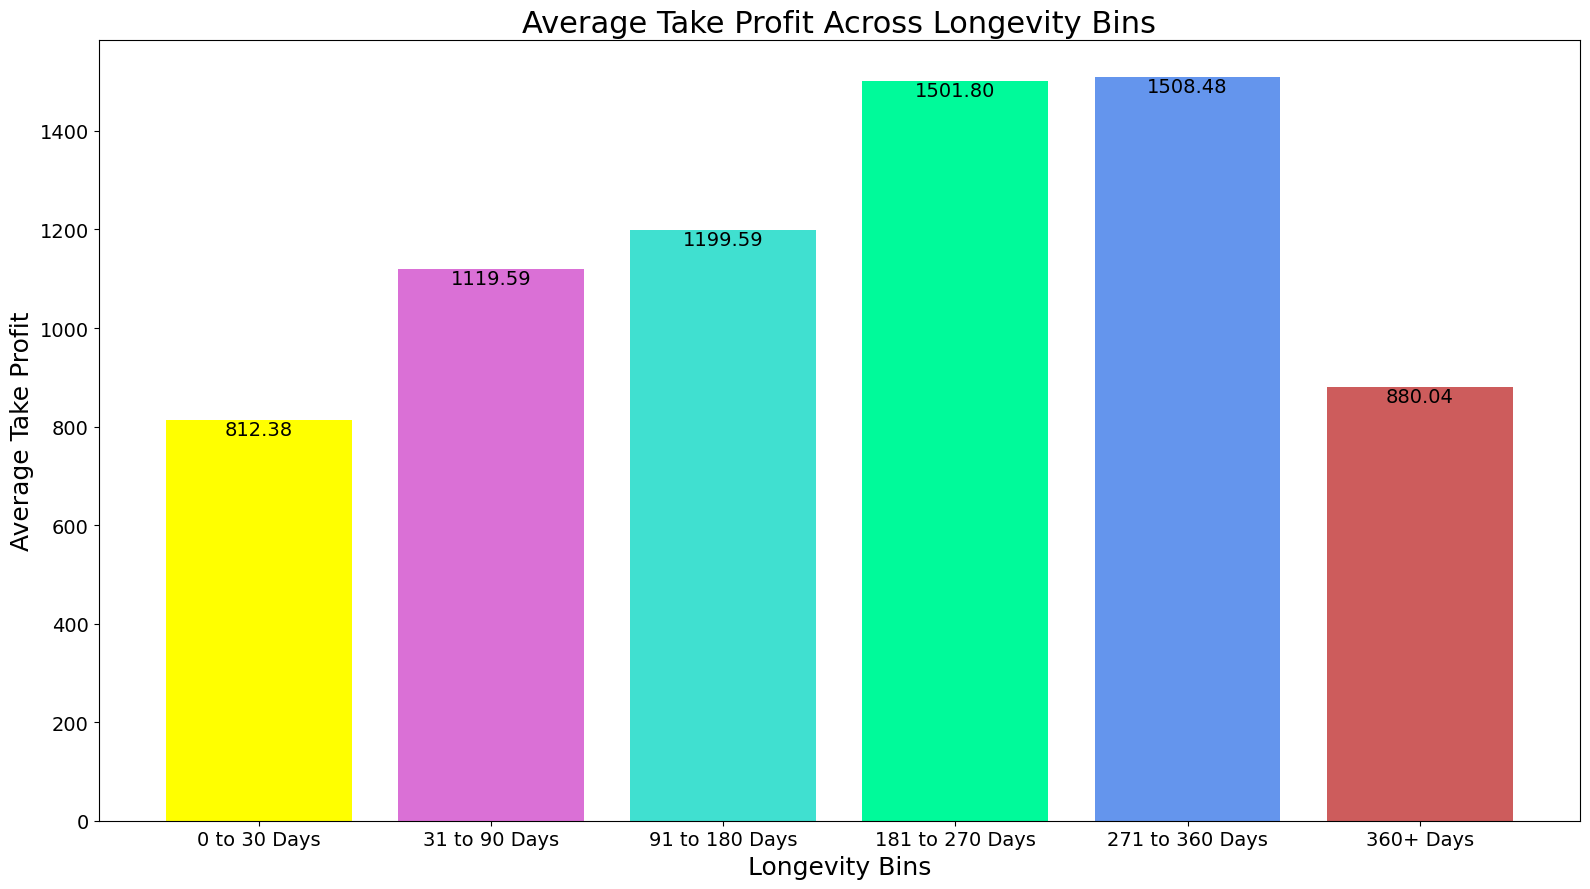

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_TP'].mean(),
    longevity_1_dataset['Average_TP'].mean(),
    longevity_2_dataset['Average_TP'].mean(),
    longevity_3_dataset['Average_TP'].mean(),
    longevity_4_dataset['Average_TP'].mean(),
    longevity_5_dataset['Average_TP'].mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{averages[i]:.2f}', ha='center', va='top', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Take Profit', fontsize=18)
plt.title('Average Take Profit Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Average Stop Loss

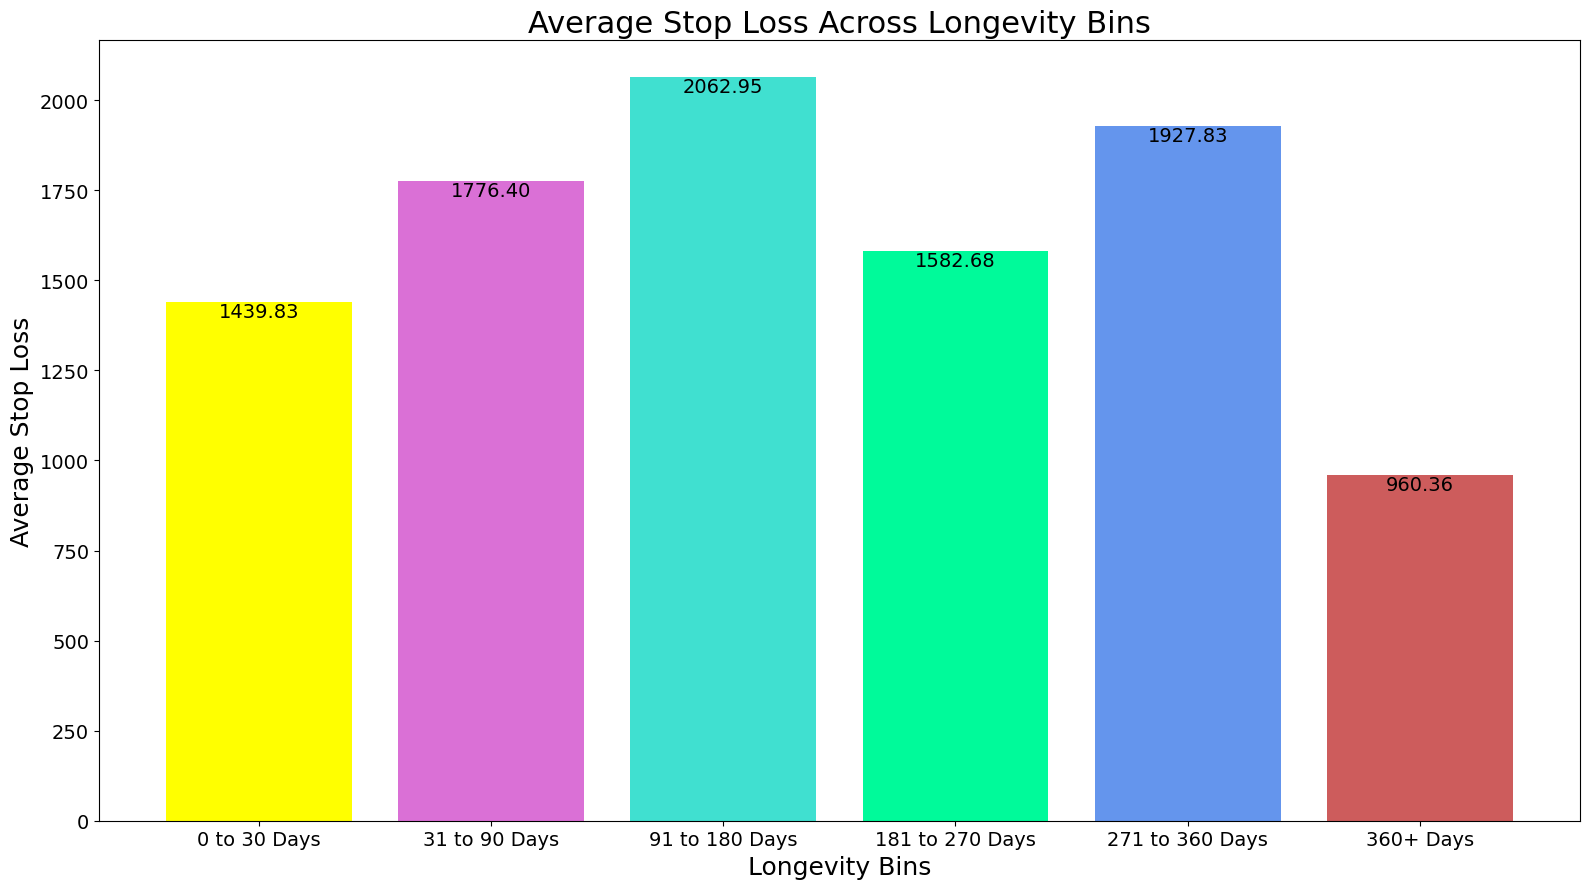

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_SL'].mean(),
    longevity_1_dataset['Average_SL'].mean(),
    longevity_2_dataset['Average_SL'].mean(),
    longevity_3_dataset['Average_SL'].mean(),
    longevity_4_dataset['Average_SL'].mean(),
    longevity_5_dataset['Average_SL'].mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{averages[i]:.2f}', ha='center', va='top', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Stop Loss', fontsize=18)
plt.title('Average Stop Loss Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Average Commission

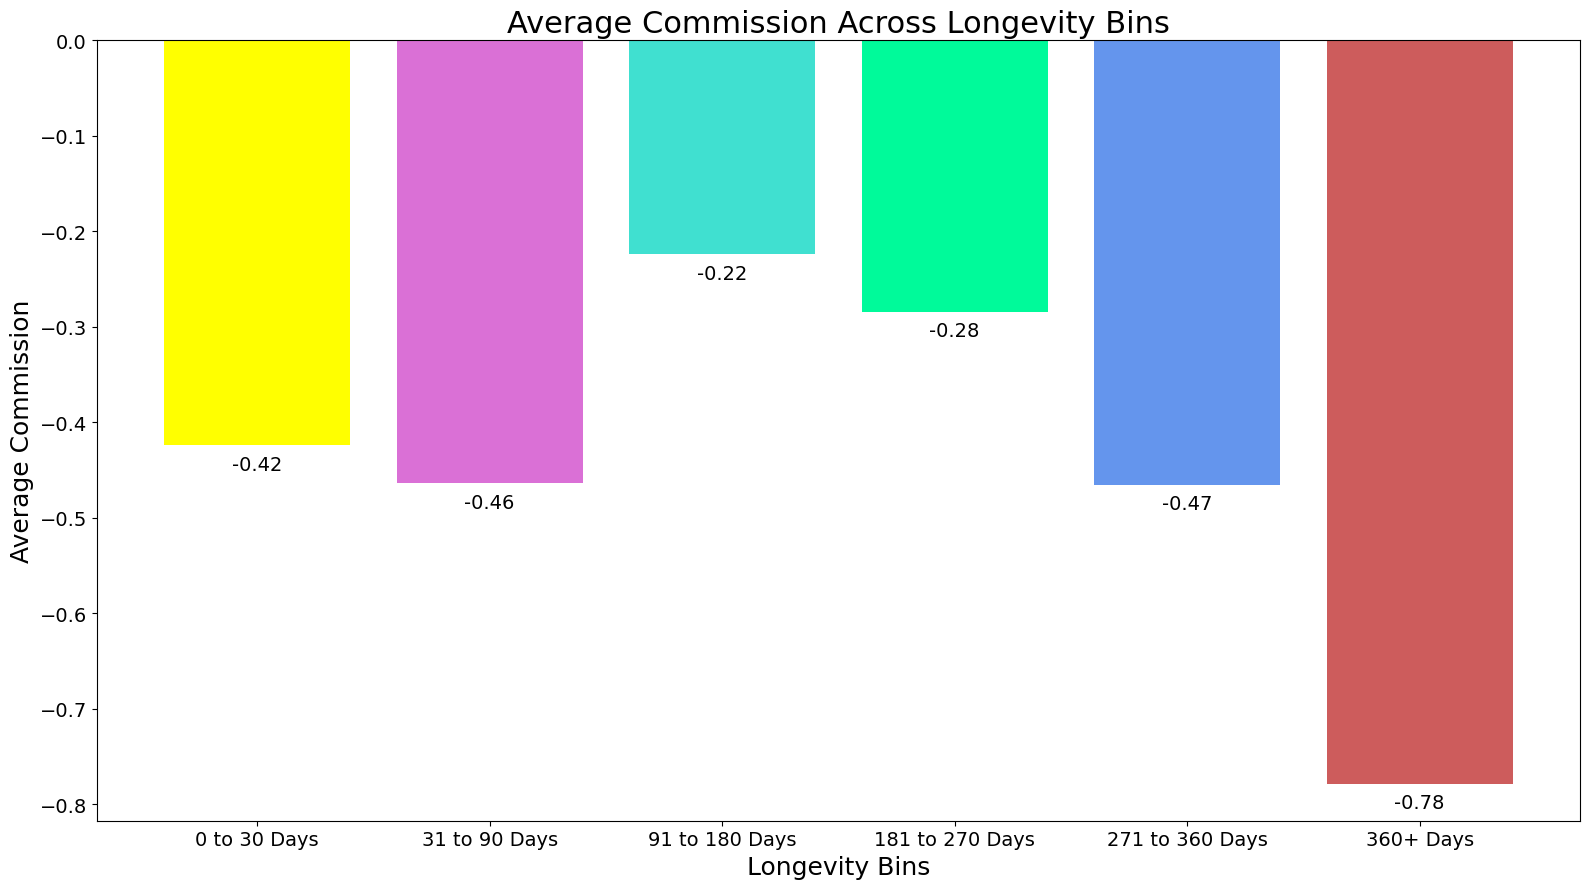

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Commission'].mean(),
    longevity_1_dataset['Average_Commission'].mean(),
    longevity_2_dataset['Average_Commission'].mean(),
    longevity_3_dataset['Average_Commission'].mean(),
    longevity_4_dataset['Average_Commission'].mean(),
    longevity_5_dataset['Average_Commission'].mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{averages[i]:.2f}', ha='center', va='top', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Commission', fontsize=18)
plt.title('Average Commission Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Average Swaps

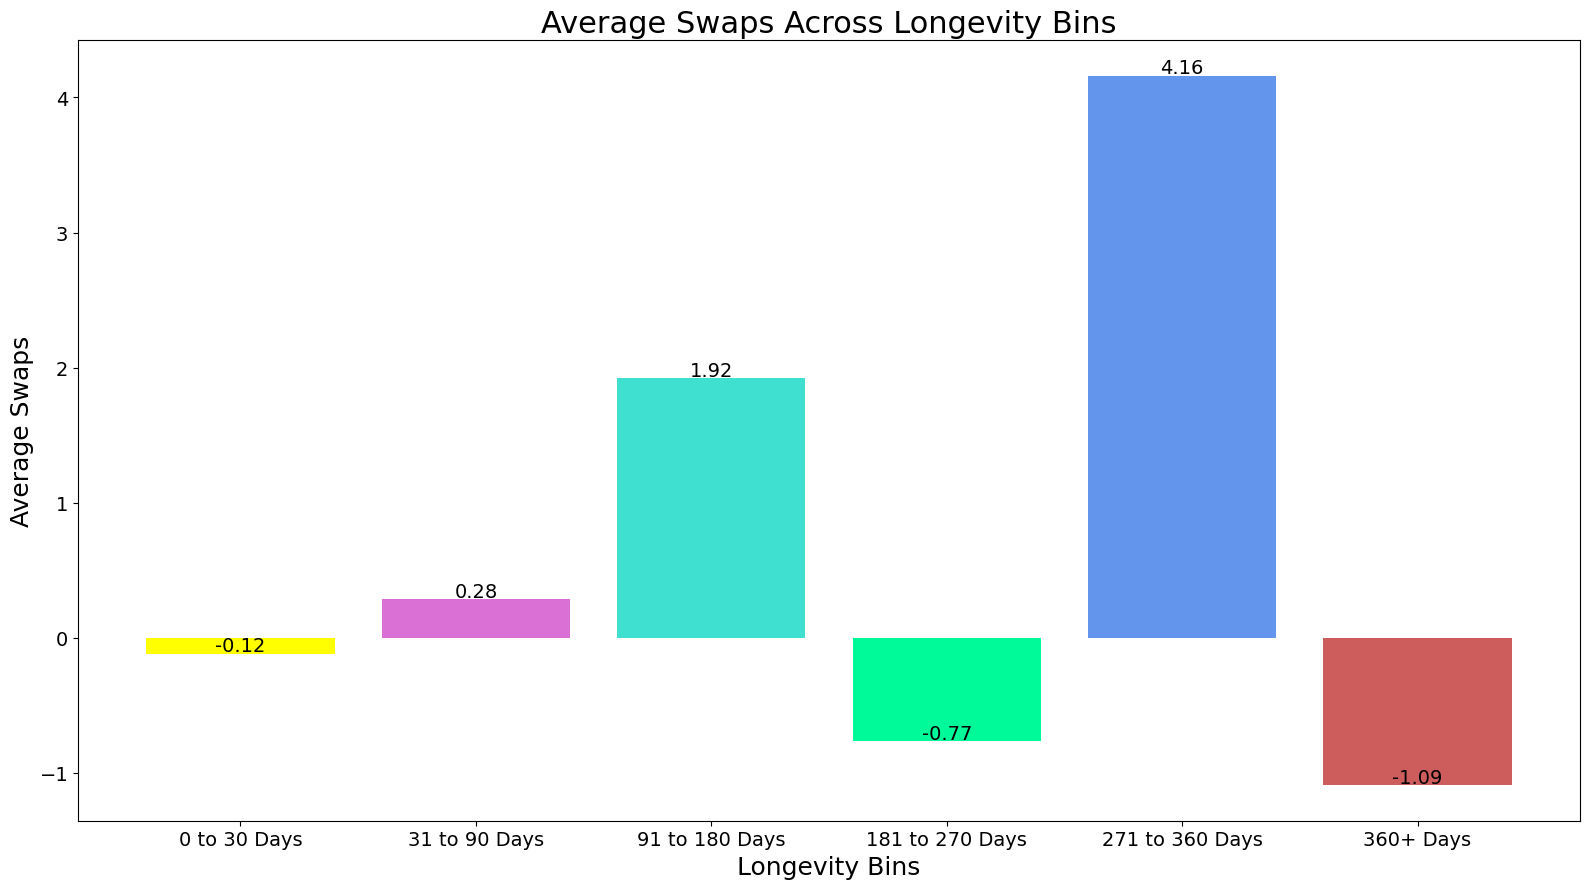

In [ ]:
import matplotlib.pyplot as plt

# Calculate averages
averages = [
    longevity_0_dataset['Average_Swaps'].mean(),
    longevity_1_dataset['Average_Swaps'].mean(),
    longevity_2_dataset['Average_Swaps'].mean(),
    longevity_3_dataset['Average_Swaps'].mean(),
    longevity_4_dataset['Average_Swaps'].mean(),
    longevity_5_dataset['Average_Swaps'].mean()
]

# Creating the plot
plt.figure(figsize=(16, 9))

# Plotting the bar graph
bars = plt.bar(range(len(averages)), averages, tick_label=bin_labels, color=colors)

# Adding labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{averages[i]:.2f}', ha='center', va='bottom', fontsize=14)

# Adding labels and title
plt.xlabel('Longevity Bins', fontsize=18)
plt.ylabel('Average Swaps', fontsize=18)
plt.title('Average Swaps Across Longevity Bins', fontsize=22)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Displaying the graph
plt.tight_layout()
plt.show()


# Country

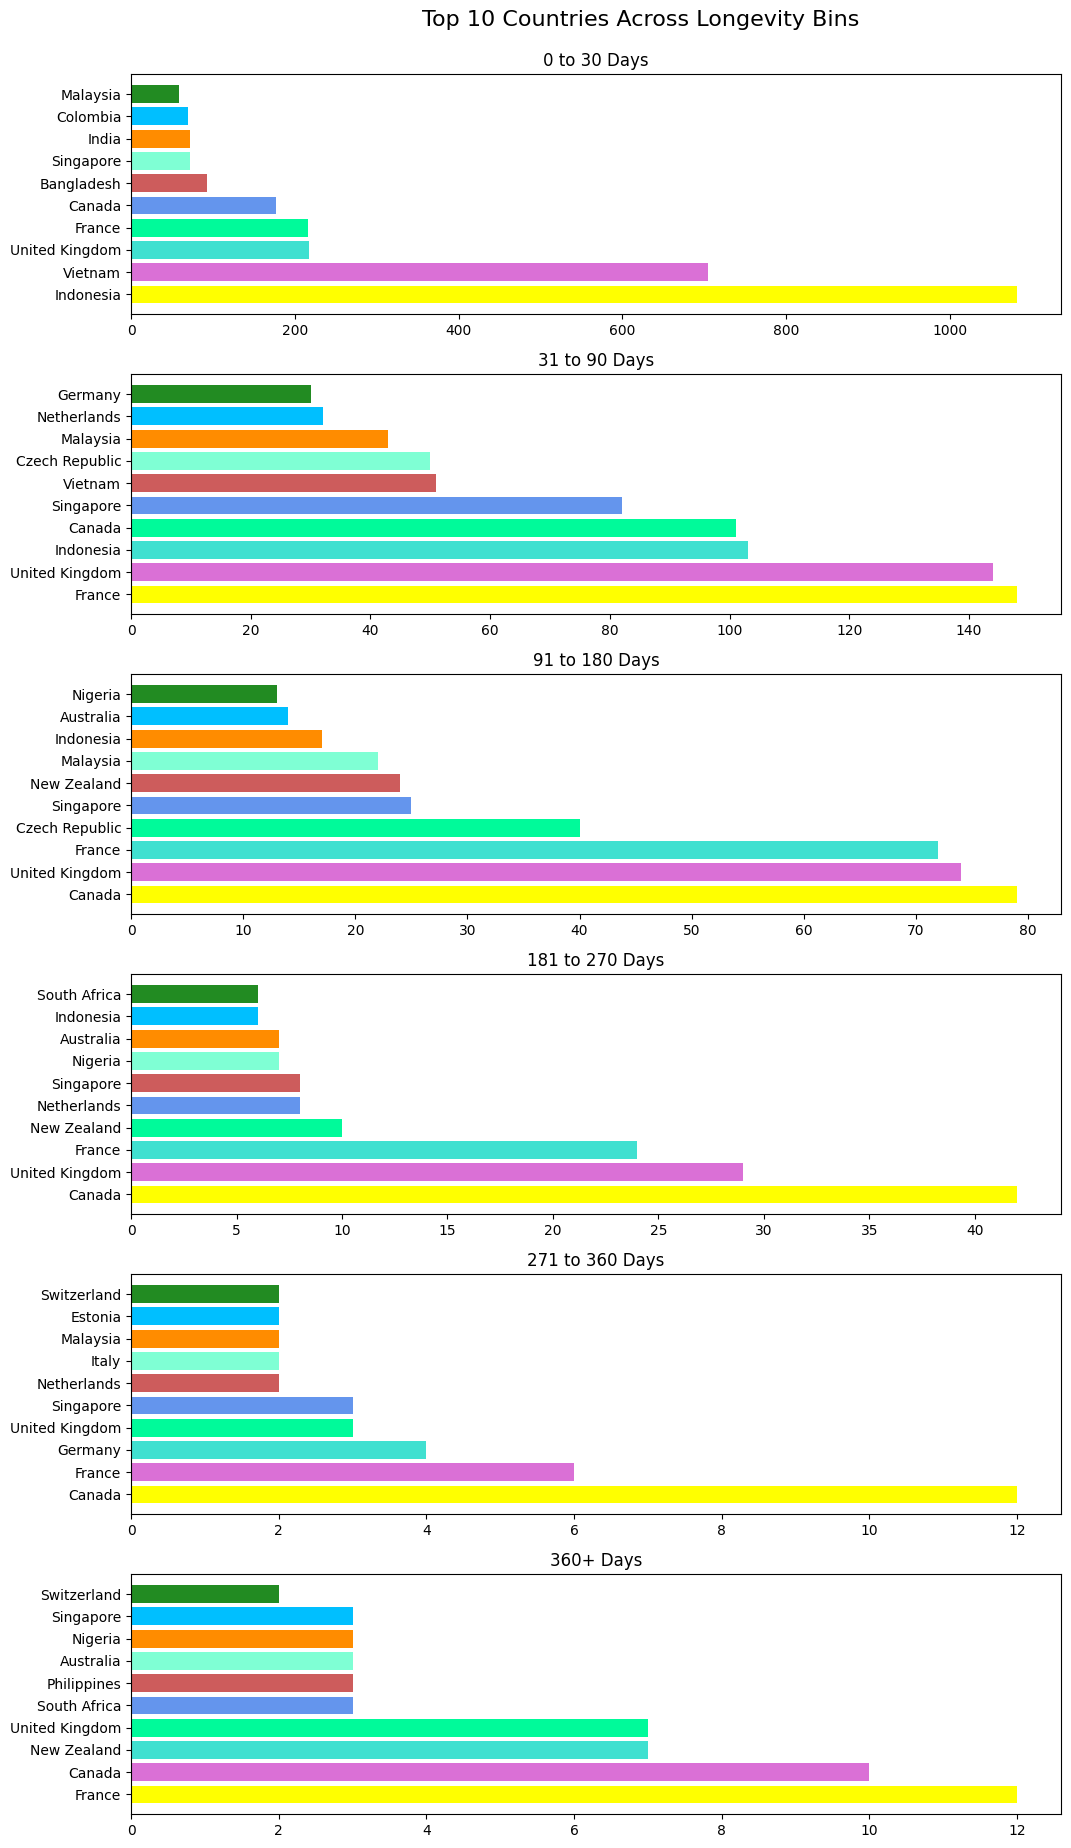

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

colors_country = ['yellow', 'orchid', 'turquoise', 'mediumspringgreen', 'cornflowerblue', 'indianred', 
          'aquamarine', 'darkorange', 'deepskyblue', 'forestgreen', 'darkviolet', 'gold',
          'mediumaquamarine', 'lightcoral', 'royalblue', 'crimson', 'sandybrown', 'darkolivegreen',
          'slateblue', 'tomato']


# Define the figure and axes
fig, ax = plt.subplots(figsize=(12, 20), nrows=6)

# Create axes for the title
title_ax = fig.add_axes([0.5, 0.97, 0.1, 0.03])  # Adjust these values as needed

# Title
title_ax.set_title('Top 10 Countries Across Longevity Bins', fontsize=16)
title_ax.axis('off')

# Iterate over each dataset
for i, dataset in enumerate([longevity_0_dataset, longevity_1_dataset, longevity_2_dataset, longevity_3_dataset, longevity_4_dataset, longevity_5_dataset]):
    # Compute country counts
    country_counts = dataset['country'].value_counts().head(10)
    
    # Plot the data with different colors for each bar
    for j, (country, count) in enumerate(zip(country_counts.index, country_counts.values)):
        ax[i].barh(country, count, color=colors_country[j])
    
    ax[i].set_title(bin_labels[i])

# Manually adjust layout
plt.subplots_adjust(top=0.98, hspace=0.25)

plt.show()
